In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
os.chdir('/Users/JTBras/Downloads')

In [4]:
admin = pd.read_csv('UCLAAdmissions.csv',sep=',')

In [5]:
admin.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
admin.shape

(400, 4)

In [28]:
admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


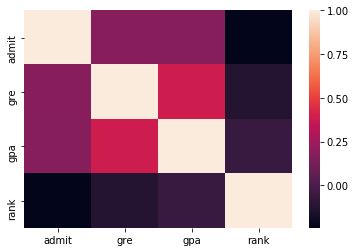

In [29]:
sns.heatmap(admin.corr())

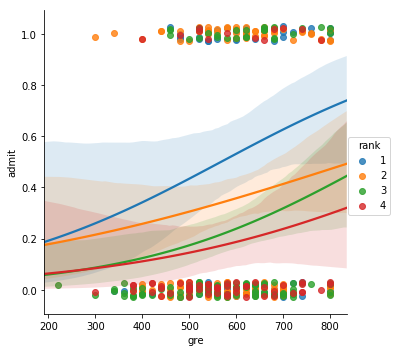

In [30]:
sns.lmplot(x='gre',y='admit',data=admin,logistic=True,y_jitter=.03,hue='rank')

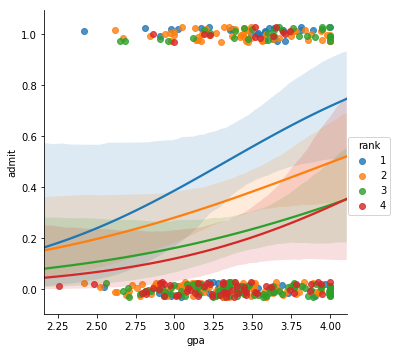

In [31]:
sns.lmplot(x='gpa',y='admit',data=admin,logistic=True,y_jitter=.03,hue='rank')

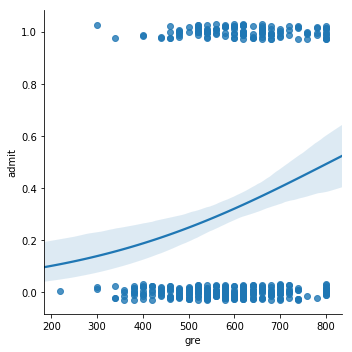

In [32]:
sns.lmplot(x='gre',y='admit',data=admin,logistic=True,y_jitter=.03)

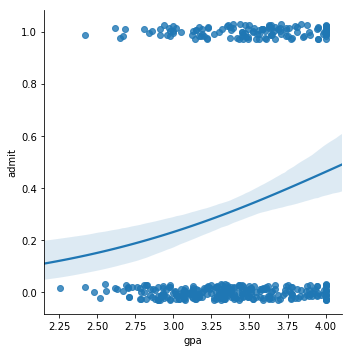

In [5]:
sns.lmplot(x='gpa',y='admit',data=admin,logistic=True,y_jitter=.03)

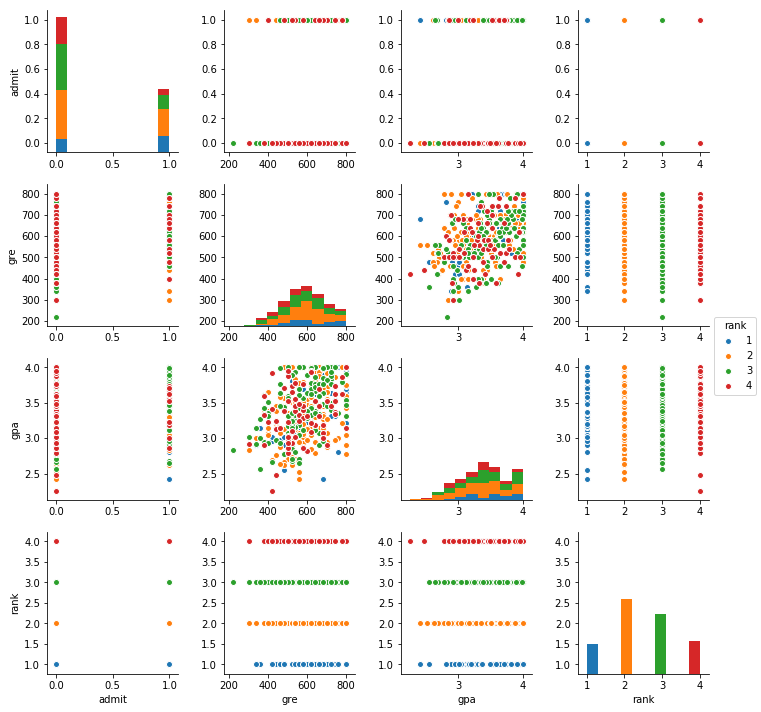

In [16]:
sns.pairplot(admin,hue='rank')

In [6]:
dum = pd.get_dummies(admin['rank'],prefix='rank')

In [7]:
dum.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [8]:
include = ['admit','gre','gpa']

In [9]:
admin = admin[include].join(dum.ix[:,'rank_2':])

/Users/JTBras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [10]:
admin.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [11]:
import statsmodels.formula.api as sm

In [12]:
dat = admin.columns[1:]

In [13]:
mod = sm.Logit(admin['admit'],admin[dat])

In [14]:
test = mod.fit()

Optimization terminated successfully.
         Current function value: 0.589306
         Iterations 5


In [15]:
print(test.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Feb 2018   Pseudo R-squ.:                 0.05707
Time:                        09:06:45   Log-Likelihood:                -235.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 9.732e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.329      0.184      -0.001       0.003
gpa           -0.1336      0.194     -0.687      0.492      -0.515       0.248
rank_2        -0.9663      0.300     -3.216      0.0

In [17]:
print(test.conf_int())

               0         1
gre    -0.000659  0.003433
gpa    -0.514719  0.247567
rank_2 -1.555108 -0.377455
rank_3 -2.196552 -0.893587
rank_4 -2.664598 -1.090586


In [21]:
print(np.exp(test.params))

gre       1.001388
gpa       0.874961
rank_2    0.380495
rank_3    0.213297
rank_4    0.152958
dtype: float64


In [36]:
import statsmodels.api as smf

/Users/JTBras/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
#dr heaton's way
logit_mod = sm.glm('admit~gre+gpa+C(rank)',data=admin,family=smf.families.Binomial()).fit()

In [39]:
logit_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Wed, 28 Feb 2018   Deviance:                       458.52
Time:                        14:07:11   Pearson chi2:                     397.
No. Iterations:                     4                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre              0.0023      0.001      2.070      0.038       0.000       0.004
gpa              0.8040      0.332      2.423      0.015       0.154       1.454
================================================================================
"""

In [40]:
100*(np.exp(logit_mod.params)-1)

Intercept       -98.149990
C(rank)[T.2]    -49.106905
C(rank)[T.3]    -73.820772
C(rank)[T.4]    -78.806246
gre               0.226699
gpa             123.454482
dtype: float64

In [41]:
100*(np.exp(logit_mod.conf_int())-1)

,0,1
Intercept,-99.801917,-82.721657
C(rank)[T.2],-72.630783,-5.364223
C(rank)[T.3],-86.694491,-48.491110
C(rank)[T.4],-90.655653,-51.930809
gre,0.012024,0.441835
gpa,16.612196,328.187682


In [42]:
# predicting gre=600 gpa=3.7 rank=2 

In [43]:
pred_df = pd.DataFrame(dict(gre=[600],gpa=[3.7],rank=[2]))

In [44]:
my_preds = logit_mod.get_prediction(pred_df)

In [46]:
my_preds.predicted_mean

array([ 0.41779601])

In [47]:
#determine appropriate cutoff value

In [48]:
n_cutoff = 100

In [49]:
cutoffs = np.linspace(0,1,num=n_cutoff)


In [50]:
misclass= np.repeat(np.NAN,n_cutoff)

In [53]:
for ct in range(0,n_cutoff):
    pred_class = (logit_mod.fittedvalues > cutoffs[ct])*1
    misclass[ct] = np.mean(pred_class!=admin['admit'])

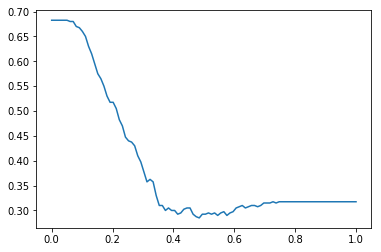

In [54]:
plt.plot(cutoffs,misclass)

In [56]:
np.mean(admin['admit'])

0.3175

In [58]:
my_cutoff = cutoffs[np.argmin(misclass)]

In [59]:
my_cutoff

0.48484848484848486

In [60]:
#confusion matrix

In [61]:
pred_class = (logit_mod.fittedvalues>my_cutoff)*1

In [63]:
conf_mat = pd.crosstab(admin['admit'],pred_class,margins=True)

In [64]:
conf_mat

col_0,0,1,All
admit,,,
0,249,24,273
1,90,37,127
All,339,61,400


In [66]:
#sensitivity
conf_mat.iloc[1,1]/conf_mat.iloc[1,2]

0.29133858267716534

In [67]:
#specificity 
conf_mat.iloc[0,0]/conf_mat.iloc[0,2]

0.91208791208791207

In [69]:
#positive predictive value
conf_mat.iloc[1,1]/conf_mat.iloc[2,1]

0.60655737704918034

In [71]:
#negative predictive value
conf_mat.iloc[0,0]/conf_mat.iloc[2,0]

0.73451327433628322